
The script studies positional encodings, a method used in Transformer models to put sequence order information into the model's input. The code generates positional encodings using sinusoidal functions with varying bases, 10000 and 10, to observe the impact on the encoding's granularity.

The resulting visualizations show distinct patterns of positional encodings: a higher base creates more intricate, high-frequency patterns, while a lower base produces smoother, lower-frequency patterns. In the context of a Transformer model, a higher base enables the model to differentiate between positions with greater sensitivity, potentially improving the model's ability to understand fine-grained positional relationships within the data. In contrast, a lower base captures broader positional relationships, which are beneficial for understanding longer sequence dependencies where specific position differentiation is less critical.

These patterns indicate how the base of positional encodings can be tuned to match the scale of positional differentiation required by the specific task at hand. For tasks requiring precise positional discrimination, such as those involving syntax in language or detailed time series analysis, a higher base might be more appropriate. For tasks where only the broader sequence context is necessary, a lower base may suffice. 

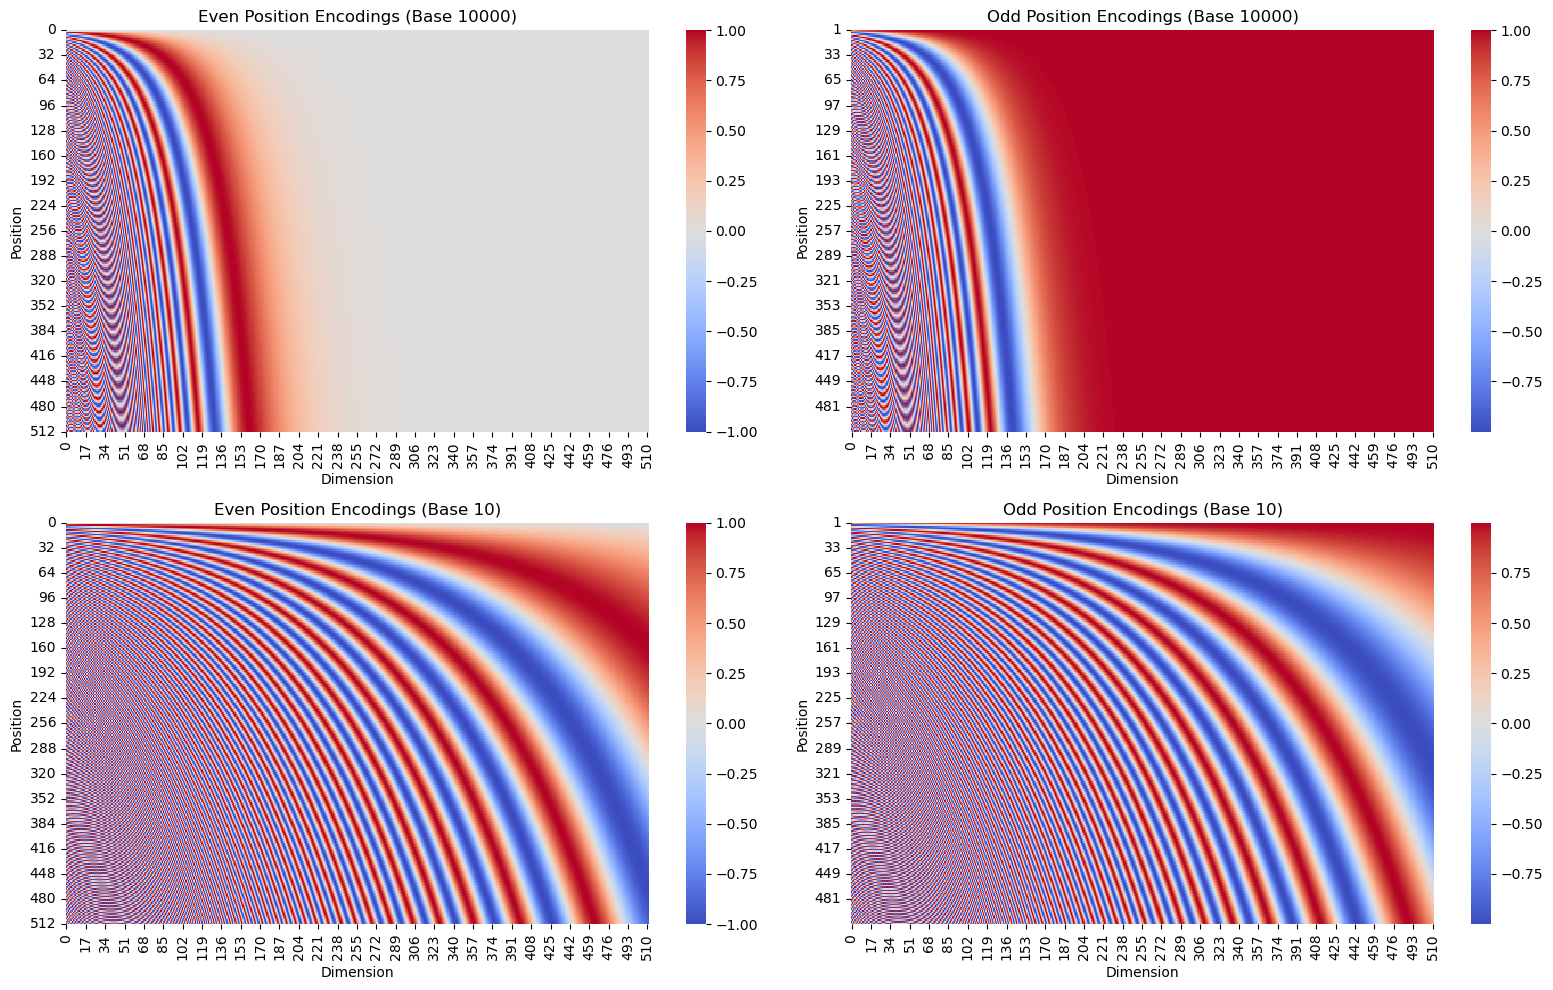

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def positional_encoding(position, d_model, base):
    angle_rads = np.arange(position)[:, np.newaxis] / np.power(base, (2 * (np.arange(d_model)[np.newaxis, :]) / d_model))
    
    angle_rads[0::2, :] = np.sin(angle_rads[0::2, :])  # even positions
    angle_rads[1::2, :] = np.cos(angle_rads[1::2, :])  # odd positions
    
    return angle_rads

# Generate positional encodings
pos_encoding_10000 = positional_encoding(512, 512, 10000)
pos_encoding_10 = positional_encoding(512, 512, 10)

# Separate the even and odd position encodings
even_position_encoding_10000 = pos_encoding_10000[0::2, :]
odd_position_encoding_10000 = pos_encoding_10000[1::2, :]

even_position_encoding_10 = pos_encoding_10[0::2, :]
odd_position_encoding_10 = pos_encoding_10[1::2, :]

# Create a new figure for the heatmaps
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot heatmaps for base 10000
sns.heatmap(even_position_encoding_10000, cmap='coolwarm', cbar=True, ax=axes[0, 0])
axes[0, 0].set_title('Even Position Encodings (Base 10000)')
axes[0, 0].set_xlabel('Dimension')
axes[0, 0].set_ylabel('Position')
axes[0, 0].set_yticks(np.arange(0, 257, step=16))
axes[0, 0].set_yticklabels(np.arange(0, 513, step=32))

sns.heatmap(odd_position_encoding_10000, cmap='coolwarm', cbar=True, ax=axes[0, 1])
axes[0, 1].set_title('Odd Position Encodings (Base 10000)')
axes[0, 1].set_xlabel('Dimension')
axes[0, 1].set_ylabel('Position')
axes[0, 1].set_yticks(np.arange(0, 256, step=16))
axes[0, 1].set_yticklabels(np.arange(1, 513, step=32))

# Plot heatmaps for base 10
sns.heatmap(even_position_encoding_10, cmap='coolwarm', cbar=True, ax=axes[1, 0])
axes[1, 0].set_title('Even Position Encodings (Base 10)')
axes[1, 0].set_xlabel('Dimension')
axes[1, 0].set_ylabel('Position')
axes[1, 0].set_yticks(np.arange(0, 257, step=16))
axes[1, 0].set_yticklabels(np.arange(0, 513, step=32))

sns.heatmap(odd_position_encoding_10, cmap='coolwarm', cbar=True, ax=axes[1, 1])
axes[1, 1].set_title('Odd Position Encodings (Base 10)')
axes[1, 1].set_xlabel('Dimension')
axes[1, 1].set_ylabel('Position')
axes[1, 1].set_yticks(np.arange(0, 256, step=16))
axes[1, 1].set_yticklabels(np.arange(1, 513, step=32))

# Save the plots as a PNG file
plt.tight_layout()
plt.savefig('positional_encodings.png')
